In [1]:
#机器学习--逻辑回归
#authored by waitingfree 2021、12、7
#参考https://www.bilibili.com/video/BV1Xt411s7KY?p=5&spm_id_from=pageDriver
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #导入画函数曲线的库

In [2]:
#将原来只有两个特征的数据集进行特征映射
#变成有28个特征，分别是ones，test1，test1^2,test1*test2,...,test1^6*test2^6.
def dataFeather(x1,x2,power):
    data={}
    #定义循环，构造函数y_=f(x1,x2)其中f是两个自变量的组合，最高power次
    for i in  np.arange(power+1):
        for j in  np.arange(i+1):
            data['F{}{}'.format(i-j,j)]=np.power(x1,i-j)*np.power(x2,j)
    return pd.DataFrame(data)

In [3]:
#定义激活函数 logistic
def sigmoid(z):
    return 1/(1+np.exp(-z));

In [4]:
#定义模型（假设函数）
def predict(X,theta):
    probility=sigmoid(X@theta)
    return [1 if x>=0.5 else 0 for x in probility]

In [5]:
#损失函数定义:对数几率 J=-1/m [y*log(y_)   +   (1-y)*log(1-y_) ]
#其中  y_=sigmoid（ theta0+theta1*x1+theta2*x2）   向量化则是 S（ X@theta）
def costFunction(X,y,theta):
    y_=sigmoid(X@theta)
    #定义损失函数的两部分
    true_al=y*np.log(y_)
    false_al=(1-y)*np.log(1-y_)
    #返回值
    return np.sum(true_al+false_al)/len(y)*(-1)
#加入正则化防止过拟合（惩罚项）
def costFunction2(X,y,theta,lr):
    y_=sigmoid(X@theta)
    #定义损失函数的两部分
    true_al=y*np.log(y_)
    false_al=(1-y)*np.log(1-y_)
    reg=np.sum(np.power(theta[1:],2))*(lr/(2*len(X)))
    #返回值
    return np.sum(true_al+false_al)/len(y)*(-1)+reg

In [6]:
#定义梯度下降函数，迭代求解最优的theta1，theta2使得代价函数最小
def gradientDescent(X,y,theta,alpha,iters):
    costList=[]
    for i in range(iters):
        A=sigmoid(X@theta) #A即是y_hat
        #向量化表示，通过变换得到矩阵形式的迭代公式
        theta=theta-(X.T@(A-y))*alpha/len(X)
        cost=costFunction(X,y,theta)
        costList.append(cost)
        if(i%1000==0):
            print(cost)
    print("最终的损失为：")
    print(cost)
    #返回我们的训练参数
    return costList,theta
#定义梯度下降函数，迭代求解最优的theta1，theta2使得代价函数最小
def gradientDescent2(X,y,theta,alpha,iters,lamda):
    costList=[]
    for i in range(iters):
        #正则项
        reg=theta[1:]*(lamda/len(X))
        reg=np.insert(reg,0,values=0,axis=0)
        
        A=sigmoid(X@theta)
        #向量化表示，通过变换得到矩阵形式的迭代公式
        theta=theta-(X.T@(A-y))*alpha/len(X)-reg
        cost=costFunction2(X,y,theta,lamda)
        costList.append(cost)
        if(i%1000==0):
            print(cost)
    print("最终的损失为：")
    print(cost)
    #返回我们的训练参数
    return costList,theta

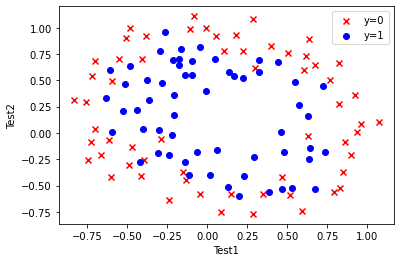

In [7]:
#读数据，数据格式（成绩1，成绩2，是否上大学）
path="ex2data2.txt"
data=pd.read_csv(path,names=['Test1','Test2','Accepted'])
data.tail()
#matplotlib做可视化
fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Test1'],data[data['Accepted']==0]['Test2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Test1'],data[data['Accepted']==1]['Test2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='Test1',
          ylabel='Test2')
plt.show()


In [8]:
#定义数据结构
data2=dataFeather(data['Test1'],data['Test2'],6)
data2.head()
#切片使用的api为iloc[行，列]
X=np.array(data2)
y=data.iloc[:,-1]
y=np.array(y)
#定义待训练参数，一共两个参数
theta=np.zeros((np.shape(X)[1],1))
print(theta.shape)
y=y.reshape(len(y),1)
y.shape

(28, 1)


(118, 1)

In [9]:
data.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [10]:
#训练
alpha=0.001
iters=200000
lamda=0.1#一个比较大的正则化惩罚会带来  欠拟合
costList,theta_final=gradientDescent(X,y,theta,alpha,iters)


0.6931343807989311
0.6818206806253246
0.6725971289020384
0.6646379677059019
0.657508287168547
0.65097029603066
0.6448863920430221
0.6391710675858542
0.6337669364681995
0.6286326131025862
0.6237364348265072
0.619053091678459
0.6145617252922241
0.610244787625312
0.6060873062331877
0.6020763774927699
0.5982007954908402
0.5944507673456604
0.5908176875019241
0.5872939547758179
0.5838728219030076
0.5805482706585636
0.5773149075635586
0.5741678764125396
0.5711027846746424
0.5681156414061115
0.5652028047516433
0.5623609374547434
0.5595869690712003
0.5568780638021369
0.5542315930453834
0.5516451119142164
0.54911633909691
0.5466431395337273
0.5442235094737118
0.5418555635449315
0.5395375235311951
0.5372677085977076
0.5350445267493931
0.5328664673400184
0.5307320944790247
0.5286400412070043
0.5265890043308895
0.5245777398267724
0.5226050587324047
0.5206698234632964
0.5187709444962906
0.5169073773728818
0.5150781199816011
0.5132822100847406
0.5115187230597155
0.5097867698296029
0.508085494960985
0

In [11]:
#预测(根据训练样本)
y_hat=np.array(predict(X,theta_final))
y_pre=y_hat.reshape(len(y_hat),1)
acc=np.mean(y_pre==y)
print(acc)

0.8135593220338984


In [12]:
costList2,theta_final2=gradientDescent2(X,y,theta,alpha,iters,lamda)

0.6931343808043247
0.6853092313769457
0.682468657526718
0.6813587324505799
0.6808978476737331
0.6806913350632312
0.6805888353170843
0.6805314383931684
0.6804953370228699
0.6804704613430752
0.6804522468511385
0.6804384159056968
0.6804276951503886
0.6804192894736895
0.6804126563796227
0.68040740251216
0.6804032316923775
0.6803999159055469
0.6803972773350363
0.6803951762525547
0.680393502349229
0.680392168283467
0.6803911047619559
0.6803902567339369
0.6803895804197043
0.6803890409766992
0.6803886106590799
0.6803882673623591
0.6803879934702022
0.6803877749392417
0.6803876005719449
0.6803874614383533
0.6803873504158933
0.6803872618229403
0.680387191126901
0.6803871347115849
0.6803870896917618
0.6803870537653038
0.6803870250952787
0.680387002215901
0.680386983957519
0.6803869693867679
0.6803869577588266
0.6803869484793237
0.6803869410739429
0.6803869351641717
0.6803869304479463
0.680386926684214
0.6803869236806058
0.6803869212836058
0.6803869193707022
0.6803869178441269
0.6803869166258568
0.

In [13]:
#预测(根据训练样本)
y_hat=np.array(predict(X,theta_final2))
y_pre=y_hat.reshape(len(y_hat),1)
acc=np.mean(y_pre==y)
print(acc)

0.6101694915254238


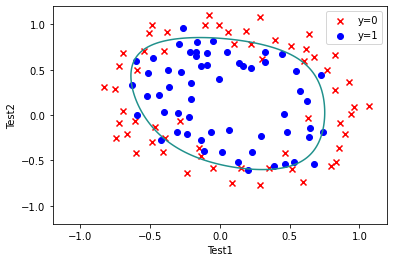

In [14]:
#绘制曲线，这里无法像之前那样，因为现在的theta是28维的，我们这里绘制等高线
x = np.linspace(-1.2,1.2,200)
xx,yy = np.meshgrid(x,x)
z = dataFeather(xx.ravel(),yy.ravel(),6).values

zz = z @ theta_final
zz = zz.reshape(xx.shape)

fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Test1'],data[data['Accepted']==0]['Test2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Test1'],data[data['Accepted']==1]['Test2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='Test1',
          ylabel='Test2')

plt.contour(xx,yy,zz,0)
plt.show()

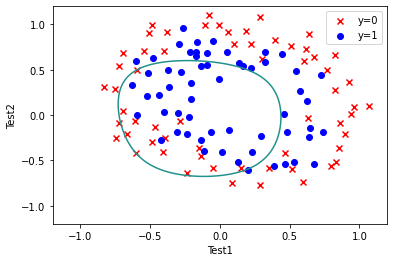

In [15]:
#绘制曲线，这里无法像之前那样，因为现在的theta是28维的，我们这里绘制等高线
x = np.linspace(-1.2,1.2,200)
xx,yy = np.meshgrid(x,x)
z = dataFeather(xx.ravel(),yy.ravel(),6).values

zz = z @ theta_final2
zz = zz.reshape(xx.shape)

fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Test1'],data[data['Accepted']==0]['Test2'],c='r',marker='x',label='y=0')
ax.scatter(data[data['Accepted']==1]['Test1'],data[data['Accepted']==1]['Test2'],c='b',marker='o',label='y=1')
ax.legend()
ax.set(xlabel='Test1',
          ylabel='Test2')

plt.contour(xx,yy,zz,0)
plt.show()